In [153]:
import numpy as np # linear algebra
import pandas as pd 
import json
import matplotlib.pyplot as plt
import seaborn as sns
import time

### The goal of this notebook will be to understand and visualise the data we have to work with. This will give us an idea of how to begin the modeling process

In [184]:
train_path = "assets/simplified-nq-train.jsonl"
test_path = "assets/simplified-nq-test.jsonl"
samp_sub = "assets/sample_submission.csv"

In [3]:
num_lines = 0
with open(train_path, 'rt') as json_file:
    for line in json_file:
        num_lines += 1
print(num_lines)

307373


#### The train data set has over 300,000 lines. We will do our exploration on a smaller sample of this

In [10]:
def get_data(path,size=10000):
    start = time.time()
    with open(train_path, 'rt') as json_file:
        count = 0
        df = []
        for line in json_file:
            count +=1
            data = json.loads(line)
            df.append(data)
            if count == size:
                break
    df = pd.DataFrame(df)
    end = time.time()
    print("Time taken : {} seconds".format(round(end-start,2)))
    return df


In [11]:
df = get_data(train_path)

Time taken : 2.66 seconds


In [12]:
df.head()

,document_text,long_answer_candidates,question_text,annotations,document_url,example_id
0,Email marketing - Wikipedia <H1> Email marketi...,"[{'start_token': 14, 'top_level': True, 'end_t...",which is the most common use of opt-in e-mail ...,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Em...,5655493461695504401
1,The Mother ( How I Met Your Mother ) - wikiped...,"[{'start_token': 28, 'top_level': True, 'end_t...",how i.met your mother who is the mother,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Th...,5328212470870865242
2,Human fertilization - wikipedia <H1> Human fer...,"[{'start_token': 14, 'top_level': True, 'end_t...",what type of fertilisation takes place in humans,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Hu...,4435104480114867852
3,List of National Football League career quarte...,"[{'start_token': 28, 'top_level': True, 'end_t...",who had the most wins in the nfl,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Li...,5289242154789678439
4,Roanoke Colony - wikipedia <H1> Roanoke Colony...,"[{'start_token': 32, 'top_level': True, 'end_t...",what happened to the lost settlement of roanoke,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",https://en.wikipedia.org//w/index.php?title=Ro...,5489863933082811018


#### Let's see what kind data is in each column of the dataset

In [13]:
df.loc[0,'document_text']

"Email marketing - Wikipedia <H1> Email marketing </H1> Jump to : navigation , search <Table> <Tr> <Td> </Td> <Td> ( hide ) This article has multiple issues . Please help improve it or discuss these issues on the talk page . ( Learn how and when to remove these template messages ) <Table> <Tr> <Td> </Td> <Td> This article needs additional citations for verification . Please help improve this article by adding citations to reliable sources . Unsourced material may be challenged and removed . ( September 2014 ) ( Learn how and when to remove this template message ) </Td> </Tr> </Table> <Table> <Tr> <Td> </Td> <Td> This article possibly contains original research . Please improve it by verifying the claims made and adding inline citations . Statements consisting only of original research should be removed . ( January 2015 ) ( Learn how and when to remove this template message ) </Td> </Tr> </Table> ( Learn how and when to remove this template message ) </Td> </Tr> </Table> <Table> <Tr> <T

In [14]:
df.loc[0,'long_answer_candidates']

[{'start_token': 14, 'top_level': True, 'end_token': 170},
 {'start_token': 15, 'top_level': False, 'end_token': 169},
 {'start_token': 52, 'top_level': False, 'end_token': 103},
 {'start_token': 53, 'top_level': False, 'end_token': 102},
 {'start_token': 103, 'top_level': False, 'end_token': 156},
 {'start_token': 104, 'top_level': False, 'end_token': 155},
 {'start_token': 170, 'top_level': True, 'end_token': 321},
 {'start_token': 171, 'top_level': False, 'end_token': 180},
 {'start_token': 180, 'top_level': False, 'end_token': 186},
 {'start_token': 186, 'top_level': False, 'end_token': 224},
 {'start_token': 188, 'top_level': False, 'end_token': 222},
 {'start_token': 189, 'top_level': False, 'end_token': 194},
 {'start_token': 194, 'top_level': False, 'end_token': 200},
 {'start_token': 200, 'top_level': False, 'end_token': 205},
 {'start_token': 224, 'top_level': False, 'end_token': 231},
 {'start_token': 231, 'top_level': False, 'end_token': 257},
 {'start_token': 233, 'top_lev

In [17]:
df.loc[0,'question_text']

'which is the most common use of opt-in e-mail marketing'

In [18]:
df.loc[0,'annotations']

[{'yes_no_answer': 'NONE',
  'long_answer': {'start_token': 1952,
   'candidate_index': 54,
   'end_token': 2019},
  'short_answers': [{'start_token': 1960, 'end_token': 1969}],
  'annotation_id': 593165450220027640}]

In [19]:
df.loc[0,'document_url']

'https://en.wikipedia.org//w/index.php?title=Email_marketing&amp;oldid=814071202'

### Data explanation

#### document_text : The entire wikepedia entry of the page from which the question must be answered

#### long_answer_candidates : This are all the possibles long answers ranges. In other words they give you the start indices and last indices of all the possibles long answers in the document text columns that could answer the question.

#### question_text : The question that should be answered

#### annotations : The correct answers for this example. Both long & short answers are given here via start and end indices

#### document_url : URL of the wiki page 

##### We can remove the document_url column as we will not be needing them for our model. We will also get a larger dataset, 100,000 rows for our exploration

In [33]:
df = get_data(train_path,100000)


Time taken : 61.56 seconds


In [34]:
df.drop(['document_url'],axis=1,inplace=True)

In [25]:
df.head()|

,document_text,long_answer_candidates,question_text,annotations,example_id
0,Email marketing - Wikipedia <H1> Email marketi...,"[{'start_token': 14, 'top_level': True, 'end_t...",which is the most common use of opt-in e-mail ...,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",5655493461695504401
1,The Mother ( How I Met Your Mother ) - wikiped...,"[{'start_token': 28, 'top_level': True, 'end_t...",how i.met your mother who is the mother,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",5328212470870865242
2,Human fertilization - wikipedia <H1> Human fer...,"[{'start_token': 14, 'top_level': True, 'end_t...",what type of fertilisation takes place in humans,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",4435104480114867852
3,List of National Football League career quarte...,"[{'start_token': 28, 'top_level': True, 'end_t...",who had the most wins in the nfl,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",5289242154789678439
4,Roanoke Colony - wikipedia <H1> Roanoke Colony...,"[{'start_token': 32, 'top_level': True, 'end_t...",what happened to the lost settlement of roanoke,"[{'yes_no_answer': 'NONE', 'long_answer': {'st...",5489863933082811018


Let's look a the question_text column in detail

In [35]:
qns = list(df['question_text'])

Let's analyse the lenght of questions in our sample

In [36]:
word_lens_list = []
for text in qns:
    word_lens_list.append(len(text.split()))    
word_lens = np.array(word_lens_list)


In [37]:
a,b,c,d = word_lens.max(), word_lens.min(), word_lens.mean(), word_lens.std()

In [38]:
print("""Max question length : {}
Min question length : {}
Average question length : {}
Std dev of question lengths : {}""".format(a,b,c,d))

Max question length : 23
Min question length : 3
Average question length : 9.23653
Std dev of question lengths : 1.8175597814377384


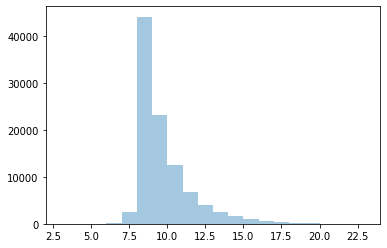

In [40]:
sns.distplot(word_lens, bins=20, kde=False)

Questions are very rarely longer than 15 words long and often 10 words of shorter

Lets check the number of candidate answers given for each question

In [82]:
cands = df['long_answer_candidates'].tolist()

In [88]:
cands_lens = []
for cand in cands:
    cands_lens.append(len(cand))

In [89]:
cands_lens = np.array(cands_lens)

In [90]:
a,b,c,d = cands_lens.max(), cands_lens.min(), cands_lens.mean(), cands_lens.std()

In [96]:
print("""Max number of candidate answers : {}
Min number of candidate answers : {}
Average number of candidate answers : {}
Std dev of number of candidate answers : {}""".format(a,b,c,d))

Max number of candidate answers : 7946
Min number of candidate answers : 1
Average number of candidate answers : 131.07038
Std dev of number of candidate answers : 171.25537313221912


The max number of candidates is a lot higher than the mean and seems like an outlier, let's check this in entry in the original dataset

In [93]:
cands_lens = cands_lens.tolist()

In [94]:
cands_lens.index(7946)

59384

In [71]:
df.loc[59384,'long_answer_candidates']

[{'start_token': 37, 'top_level': True, 'end_token': 65},
 {'start_token': 494, 'top_level': True, 'end_token': 2067},
 {'start_token': 495, 'top_level': False, 'end_token': 509},
 {'start_token': 509, 'top_level': False, 'end_token': 544},
 {'start_token': 544, 'top_level': False, 'end_token': 579},
 {'start_token': 579, 'top_level': False, 'end_token': 614},
 {'start_token': 614, 'top_level': False, 'end_token': 649},
 {'start_token': 649, 'top_level': False, 'end_token': 685},
 {'start_token': 685, 'top_level': False, 'end_token': 721},
 {'start_token': 721, 'top_level': False, 'end_token': 757},
 {'start_token': 757, 'top_level': False, 'end_token': 793},
 {'start_token': 793, 'top_level': False, 'end_token': 829},
 {'start_token': 829, 'top_level': False, 'end_token': 865},
 {'start_token': 865, 'top_level': False, 'end_token': 901},
 {'start_token': 901, 'top_level': False, 'end_token': 937},
 {'start_token': 937, 'top_level': False, 'end_token': 973},
 {'start_token': 973, 'top_

In [72]:
df.loc[59384,'document_text']

'List of Chopped episodes - wikipedia <H1> List of Chopped episodes </H1> Jump to : navigation , search This article is about Chopped USA . For Chopped Canada , see Chopped : Canada § Episode Guide . <P> This is the list of episodes for the Food Network competition reality series Chopped . New episodes are broadcast on Tuesdays at 10 p.m. ET . </P> <P> </P> <H2> Contents </H2> ( hide ) <Ul> <Li> 1 Series overview </Li> <Li> 2 Season 1 ( 2009 ) </Li> <Li> 3 Season 2 ( 2009 ) </Li> <Li> 4 Season 3 ( 2009 -- 10 ) </Li> <Li> 5 Season 4 ( 2010 ) </Li> <Li> 6 Season 5 ( 2010 ) </Li> <Li> 7 Season 6 ( 2011 ) </Li> <Li> 8 Season 7 ( 2011 ) </Li> <Li> 9 Season 8 ( 2011 ) </Li> <Li> 10 Season 9 ( 2011 ) </Li> <Li> 11 Season 10 ( 2011 -- 12 ) </Li> <Li> 12 Season 11 ( 2012 ) </Li> <Li> 13 Season 12 ( 2012 ) </Li> <Li> 14 Season 13 ( 2012 -- 13 ) </Li> <Li> 15 Season 14 ( 2013 ) </Li> <Li> 16 Season 15 ( 2013 ) </Li> <Li> 17 Season 16 ( 2013 ) </Li> <Li> 18 Season 17 ( 2013 ) </Li> <Li> 19 Season 

This entry's document text contains a large table, hence the high number of candidate answers

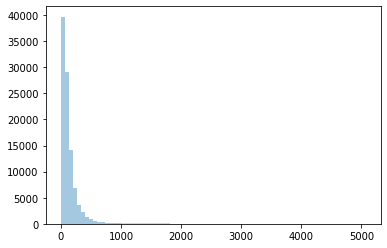

In [102]:
cands_len_n = [c for c in cands_lens if c <=1000]
cands_len_o = [c for c in cands_lens if c >=1000]
sns.distplot(cands_len_n, bins=15, kde=False)
sns.distplot(cands_len_o, bins=15, kde=False)

99532 of 100000 entries under 1000 candidates


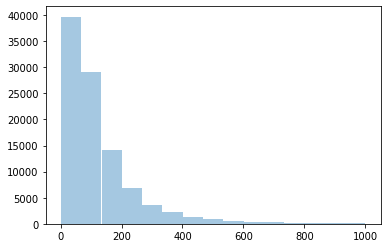

In [106]:
sns.distplot(cands_len_n, bins=15, kde=False)
print("{} of {} entries under 1000 candidates".format(len(cands_len_n),len(cands_len)))

468 of 100000 entries above 1000 candidates


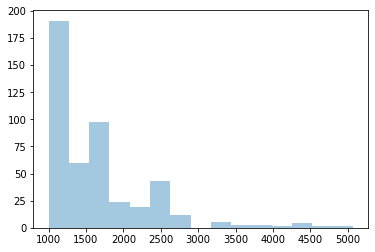

In [105]:
sns.distplot(cands_len_o, bins=15, kde=False)
print("{} of {} entries above 1000 candidates".format(len(cands_len_o),len(cands_len)))

Average number of candidates is 131. For training our model, we will have to look at reducing the number of candidates, perhaps using a metric like cosine similarity to the question to limit the number of candidates to 25

Now let's look at the annotations columns

In [107]:
df.loc[10,'annotations']

[{'yes_no_answer': 'NONE',
  'long_answer': {'start_token': 20, 'candidate_index': 0, 'end_token': 82},
  'short_answers': [],
  'annotation_id': 13376710960238993100}]

Short answers can be Yes/No answers or an answer from the document text

In [109]:
yn_answer_count = 0
short_answer_count = 0
long_answer_count = 0
for i in df.index:
    an = df.loc[i,'annotations'][0]
    if an['yes_no_answer'] != "NONE":
        yn_answer_count += 1
    if an['short_answers']:
        short_answer_count +=1
    if an['long_answer']['candidate_index'] != -1:
        long_answer_count +=1

In [110]:
print("""{} of {} questions have Yes/No answers
{} of {} questions have short answers
{} of {} questions have long answers""".format(yn_answer_count,len(df),short_answer_count,len(df),long_answer_count,len(df)))

1215 of 100000 questions have Yes/No answers
34768 of 100000 questions have short answers
49436 of 100000 questions have long answers


More than half of the questions do not have an answer

Let's generate the actual text answers from the span indices to do analysis on word frequencies in questions and answers

In [176]:
def get_ans(row):
    #print('jfkd')
    ans1 = row['annotations'][0]['long_answer']['start_token']
    ans2 = row['annotations'][0]['long_answer']['end_token']
    doc = row['document_text'].split(" ")
    #print(doc)
    ans = " ".join(doc[ans1:ans2])
    ans = strip_tags(ans)
    #print(ans)
    return ans

from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html): #For removing html tags from answers
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [177]:
import warnings
pd.options.mode.chained_assignment = None
df['answer'] =""
df['answer'] = df.apply(get_ans,axis=1)

In [146]:
from wordcloud import WordCloud, STOPWORDS 

In [178]:
def word_cloud(col,df,stopwords=True):
    comment_words = ' '
    if stopwords:
        stopwords = set(STOPWORDS) 
    else:
        stopwords = []
    # iterate through the csv file 
    for val in df[col]: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (10, 6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

Word clouds for questions without stopwords


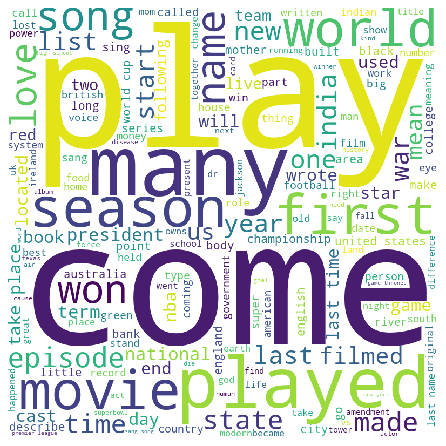

In [179]:
print("Word clouds for questions without stopwords")
word_cloud('question_text',df.head(1000))

Word clouds for questions with stopwords


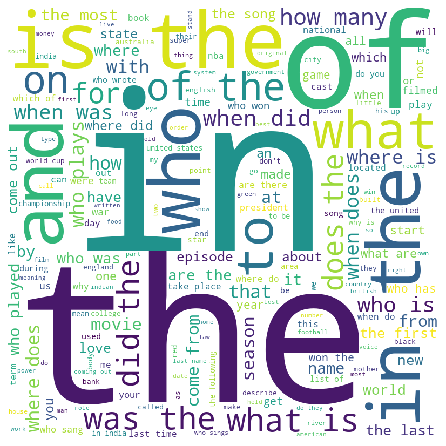

In [180]:
print("Word clouds for questions with stopwords")
word_cloud('question_text',df.head(1000),stopwords=False)

Word clouds for answers with stopwords


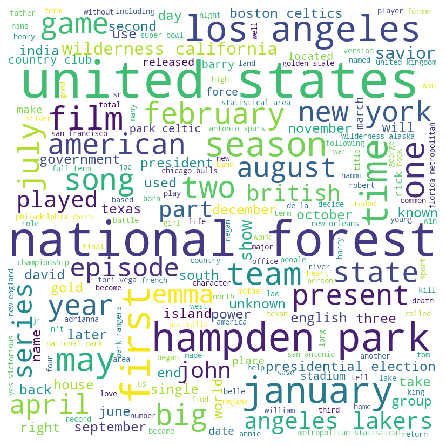

In [181]:
print("Word clouds for answers with stopwords")
word_cloud('answer',df.head(1000))

Word clouds for answers with stopwords


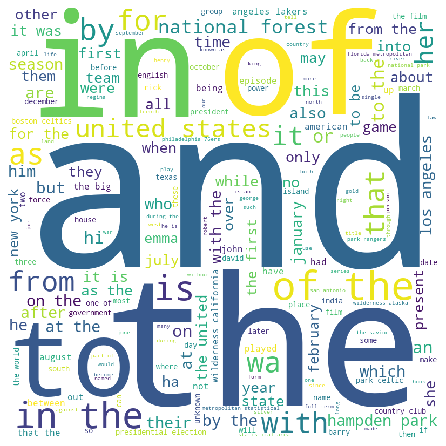

In [182]:
print("Word clouds for answers with stopwords")
word_cloud('answer',df.head(1000),stopwords=False)

The plan for the model is to first create a long answer model, then create a seperate model to extract short answers from the predicted long answer. 

We will have to process the training data such that each row is one candidate answer with a target 1/0. We will limit each question to 25 candidates using cosine similarity to narrow down the candidates

The short answer model will be simillar, we will create candidate answers from the long answer by splitting the long answers into sentences, named entities, dates etc.

Now let's take a look at the test set and sample submissions

In [185]:
num_lines = 0
with open(test_path, 'rt') as json_file:
    for line in json_file:
        num_lines += 1
print("The test set contains {} questions".format(num_lines))

The test set contains 346 questions


In [190]:
count = 0
with open(test_path, 'rt') as json_file:
    for line in json_file:
        l = json.loads(line)
        if count == 0:
            break

In [192]:
l.keys()

dict_keys(['example_id', 'question_text', 'document_text', 'long_answer_candidates'])

Test set contains the same data as the training set except wihtout the annotations column

In [193]:
sub = pd.read_csv(samp_sub)
sub.head()

,example_id,PredictionString
0,-1011141123527297803_long,NaN
1,-1011141123527297803_short,NaN
2,-1028916936938579349_long,NaN
3,-1028916936938579349_short,NaN
4,-1055197305756217938_long,NaN


In [194]:
len(sub)

692

Each test example will require a "PredictionString". This will be in the form X:Y where X is the starting index of the answer and Y is the ending index

### Preprocessing

#### We will write a function to extract training data into the form mentioned above. We will only be using 5000 rows of data. This will translate to more than 250,000 training exampls as each row will have 25 candidates. In addition to the 250,000, we will later be upsampling correct answers for a more balanced training set. 295,000 rows of data from the competiotion data will not be used for the long answer model training

In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def ext_json(path,x):
    counter = 0
    with open(path, 'rt') as json_file:
        counter +=1
        ids = []
        question = []
        candidate = []
        #answer_string = []
        target = []
        sa = []
        has_sa = []
        cs = []
        cnt = 0

        batch = []
        batch_cnt = 0
        for line in json_file:
            
            t = json.loads(line) 
            if t['annotations'][0]['long_answer']['start_token'] != -1:
                batch.append(t)

                batch_cnt += 1
                cnt += 1
                
                results = get_data(t)
                #with Pool(processes=3) as pool: 
                    #results = pool.map_async(get_data, t)
                    #results = results.get()
                    #pass
                ids.extend(results['ids'])
                question.extend(results['question'])
                candidate.extend(results['candidate'])
                target.extend(results['target'])
                has_sa.extend(results['has_sa'])
                sa.extend(results['short_answer'])
                cs.extend(results['cos_s'])

            if cnt == x:
                df = pd.DataFrame()
                df['ids'] = ids
                df['questions'] = question
                df['candidate'] = candidate
                df['target'] = target
                df['short_answer'] = sa
                df['has_sa'] = has_sa
                df['cos_s'] = cs
                break
        
        return df
    
def get_data(t): #Short answers not being collected
    ids = []
    question = []
    candidate = []
    #answer_string = []
    target = []
    short_answer = []
    has_sa = []
    cos_s = []
    #short_answer_string = []
    #print("hello from function")
    #print(type(t))
    ex_id = t['example_id']
    doc_text = t['document_text']
    c_ans = t['long_answer_candidates']
    q = t['question_text']
    yn = t['annotations'][0]['yes_no_answer']
    ans_idx = t['annotations'][0]['long_answer']['candidate_index']
    ans1 = t['annotations'][0]['long_answer']['start_token']
    ans2 = t['annotations'][0]['long_answer']['end_token']
    sp_doc = t['document_text'].split(" ")
    answer = " ".join(sp_doc[ans1:ans2])
    has_short_a = int(bool(t['annotations'][0]['short_answers']))
    if has_short_a:
        sa = sp_doc[t['annotations'][0]['short_answers'][0]['start_token']:t['annotations'][0]['short_answers'][0]['end_token']]
        sa = " ".join(sa)
    else:
        sa = ""
    for i in range(len(c_ans)):
        
        if i != ans_idx:
            s = c_ans[i]['start_token']
            e = c_ans[i]['end_token']
            can_answer = " ".join(sp_doc[s:e])
            cs = get_cosine(q, can_answer)
            #if cs >= 0.15:
            ids.append(ex_id)
            question.append(q)
            short_answer.append(sa)
            has_sa.append(has_short_a)

            candidate.append(can_answer)
            target.append(0)

            cos_s.append(cs)
            
        else:
            ids.append(ex_id)
            question.append(q)
            short_answer.append(sa)
            has_sa.append(has_short_a)
            candidate.append(answer)
            cs = get_cosine(q, answer)
            cos_s.append(cs)
            target.append(1)
            
        
            
    r = {"ids":ids,
         "question":question,
         "candidate":candidate,
         "target":target,
         "short_answer": short_answer,
         "has_sa":has_sa,
         "cos_s":cos_s
        }
    
    df = pd.DataFrame(r)
    r = df.sort_values("cos_s",ascending=False).head(25).to_dict('list')
    
    
    return(r)

def get_cosine(qns, ans):
    h = TfidfVectorizer()
    h = h.fit([qns+ans])
    vec1 = h.transform([qns])
    vec2 = h.transform([ans])
    c = cosine_similarity(vec1,vec2)
    return float(c[0])

In [202]:
train_df = ext_json(train_path,10) #Dataset for the first 10 rows, the dataset for training has been prepared seperately

In [200]:
train_df.head()

,ids,questions,candidate,target,short_answer,has_sa,cos_s
0,5655493461695504401,which is the most common use of opt-in e-mail ...,"<P> Opt - in email advertising , or permission...",0,a newsletter sent to an advertising firm 's cu...,1,0.455650
1,5655493461695504401,which is the most common use of opt-in e-mail ...,<P> In 2002 the European Union ( EU ) introduc...,0,a newsletter sent to an advertising firm 's cu...,1,0.418121
2,5655493461695504401,which is the most common use of opt-in e-mail ...,<P> Opt - in email marketing may evolve into a...,0,a newsletter sent to an advertising firm 's cu...,1,0.408154
3,5655493461695504401,which is the most common use of opt-in e-mail ...,<P> Email marketing has evolved rapidly alongs...,0,a newsletter sent to an advertising firm 's cu...,1,0.385047
4,5655493461695504401,which is the most common use of opt-in e-mail ...,<Ul> <Li> An exact return on investment can be...,0,a newsletter sent to an advertising firm 's cu...,1,0.354566


### In the following section, we will be building our model and getting our data ready for training